<a href="https://colab.research.google.com/github/anuragdotexe/MNIST-NN-Classifier/blob/main/main-file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow numpy pandas matplotlib scikit-learn

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
# Load dataset
from tensorflow.keras.datasets import mnist

# Load training and testing data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize pixel values to the range [0,1]
X_train, X_test = X_train / 255.0, X_test / 255.0

# Flatten images (convert 28x28 matrix into 1D array of 784 pixels)
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

# Check shape
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 784)
Testing data shape: (10000, 784)


In [ ]:
# Create a simple feedforward neural network
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(784,)),  # Hidden Layer 1
    keras.layers.Dense(64, activation='relu'),  # Hidden Layer 2
    keras.layers.Dense(10, activation='softmax')  # Output Layer (10 classes for digits 0-9)
])

# Print the model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model (Define loss function, optimizer, and evaluation metric)
model.compile(
    optimizer='adam',  # Adaptive optimization algorithm
    loss='sparse_categorical_crossentropy',  # Suitable for multi-class classification
    metrics=['accuracy']
)


In [ ]:
# Train the model on training data
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8736 - loss: 0.4370 - val_accuracy: 0.9579 - val_loss: 0.1329
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9668 - loss: 0.1096 - val_accuracy: 0.9633 - val_loss: 0.1111
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9777 - loss: 0.0708 - val_accuracy: 0.9764 - val_loss: 0.0756
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9836 - loss: 0.0535 - val_accuracy: 0.9756 - val_loss: 0.0799
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9870 - loss: 0.0398 - val_accuracy: 0.9745 - val_loss: 0.0830
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9895 - loss: 0.0321 - val_accuracy: 0.9770 - val_loss: 0.0858
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9909 - loss: 0.0262 - val_accuracy: 0.9788 - val_loss: 0.0778
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9928 - loss: 0.0225

In [ ]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9724 - loss: 0.1119

Test Accuracy: 0.9774


In [ ]:
# Make a prediction
predictions = model.predict(X_test)

# Print the predicted class for the first test sample
predicted_label = np.argmax(predictions[0])
print(f"Predicted Label: {predicted_label}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Predicted Label: 7


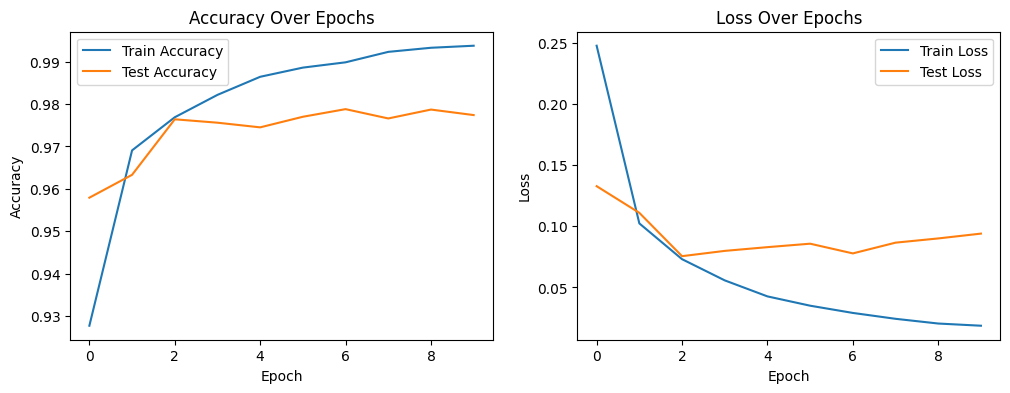

In [ ]:
# Plot training accuracy and loss
plt.figure(figsize=(12,4))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.show()